<a href="https://colab.research.google.com/github/KazimWalji/DigitClassifier-PyTorch/blob/main/DigitClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import torch
import torchvision
import matplotlib.pyplot as plt
from time import time
from torchvision import datasets, transforms
from torch import nn, optim
from torchvision.models.vgg import model_urls
from torchvision import models

In [ ]:
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)),
                              ])
!wget www.di.ens.fr/~lelarge/MNIST.tar.gz
!tar -zxvf MNIST.tar.gz
root_dir = './'
trainset = datasets.MNIST(root=root_dir, download=True, train=True, transform=transform)
valset = datasets.MNIST(root=root_dir, download=True, train=False, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
valloader = torch.utils.data.DataLoader(valset, batch_size=64, shuffle=True)

--2021-03-25 18:32:03--  http://www.di.ens.fr/~lelarge/MNIST.tar.gz
Resolving www.di.ens.fr (www.di.ens.fr)... 129.199.99.14
Connecting to www.di.ens.fr (www.di.ens.fr)|129.199.99.14|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.di.ens.fr/~lelarge/MNIST.tar.gz [following]
--2021-03-25 18:32:03--  https://www.di.ens.fr/~lelarge/MNIST.tar.gz
Connecting to www.di.ens.fr (www.di.ens.fr)|129.199.99.14|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/x-gzip]
Saving to: ‘MNIST.tar.gz.3’

MNIST.tar.gz.3          [      <=>           ]  33.20M  32.8MB/s    in 1.0s    

2021-03-25 18:32:04 (32.8 MB/s) - ‘MNIST.tar.gz.3’ saved [34813078]

MNIST/
MNIST/raw/
MNIST/raw/train-labels-idx1-ubyte
MNIST/raw/t10k-labels-idx1-ubyte.gz
MNIST/raw/t10k-labels-idx1-ubyte
MNIST/raw/t10k-images-idx3-ubyte.gz
MNIST/raw/train-images-idx3-ubyte
MNIST/raw/train-labels-idx1-ubyte.gz
MNIST/raw/t10k-images-idx3-ubyte
MNIST/raw

In [ ]:
dataiter = iter(trainloader)
images, labels = dataiter.next()

print(images.shape)
print(labels.shape)

torch.Size([64, 1, 28, 28])
torch.Size([64])


torch.Size([64, 1, 28, 28])
torch.Size([64])
Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): LogSoftmax(dim=1)
)


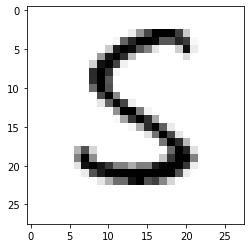

In [ ]:
dataiter = iter(trainloader)
images, labels = dataiter.next()

print(images.shape)
print(labels.shape)
plt.imshow(images[0].numpy().squeeze(), cmap='gray_r');

model = nn.Sequential(nn.Linear(784, 128), #784 input layers, 128 output layers
                      nn.ReLU(), #relu function on weights
                      nn.Linear(128, 64), #2nd layer, 128 neurons, next layer has 64
                      nn.ReLU(), #Relu to 2nd hidden layer
                      nn.Linear(64, 10), #linear function from last hidden to output (10 numbers)
                      nn.LogSoftmax(dim=1)) #used in classification NNs
print(model)

In [ ]:
criterion = nn.NLLLoss()
images, labels = next(iter(trainloader))
images = images.view(images.shape[0], -1)

logps = model(images)   #log probabilities
loss = criterion(logps, labels) #calculate the NLL loss

print('Before backward pass: \n', model[0].weight.grad)
loss.backward()
print('After backward pass: \n', model[0].weight.grad)

Before backward pass: 
 None
After backward pass: 
 tensor([[-3.1753e-03, -3.1753e-03, -3.1753e-03,  ..., -3.1753e-03,
         -3.1753e-03, -3.1753e-03],
        [ 3.7428e-05,  3.7428e-05,  3.7428e-05,  ...,  3.7428e-05,
          3.7428e-05,  3.7428e-05],
        [ 5.5501e-04,  5.5501e-04,  5.5501e-04,  ...,  5.5501e-04,
          5.5501e-04,  5.5501e-04],
        ...,
        [ 1.7019e-04,  1.7019e-04,  1.7019e-04,  ...,  1.7019e-04,
          1.7019e-04,  1.7019e-04],
        [-5.4233e-04, -5.4233e-04, -5.4233e-04,  ..., -5.4233e-04,
         -5.4233e-04, -5.4233e-04],
        [ 4.8325e-03,  4.8325e-03,  4.8325e-03,  ...,  4.8325e-03,
          4.8325e-03,  4.8325e-03]])


In [ ]:
optimizer = optim.SGD(model.parameters(), lr=0.003, momentum=0.9)
time0 = time()
epochs = 15 #how many times going over the data, updating the weights. The more we iterate, the more accurate the model
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        # Flatten MNIST images into a 784 long vector
        images = images.view(images.shape[0], -1)
    
        # Training pass
        optimizer.zero_grad()
        
        output = model(images)
        loss = criterion(output, labels)
        
        #This is where the model learns by backpropagating
        loss.backward()
        
        #And optimizes its weights here
        optimizer.step()
        
        running_loss += loss.item()
    else:
        print("Epoch {} - Training loss: {}".format(e, running_loss/len(trainloader)))
print("\nTraining Time (in minutes) =",(time()-time0)/60)

images, labels = next(iter(valloader))

img = images[0].view(1, 784)
with torch.no_grad():
    logps = model(img)

ps = torch.exp(logps)
probab = list(ps.numpy()[0])
print("Predicted Digit =", probab.index(max(probab)))

Epoch 0 - Training loss: 0.6506523206385214
Epoch 1 - Training loss: 0.28058853787558674
Epoch 2 - Training loss: 0.2206010064686031
Epoch 3 - Training loss: 0.17993186455148497
Epoch 4 - Training loss: 0.1512565128247081
Epoch 5 - Training loss: 0.13024563987109897
Epoch 6 - Training loss: 0.11464268809704702
Epoch 7 - Training loss: 0.10249266615892047
Epoch 8 - Training loss: 0.09224003469789906
Epoch 9 - Training loss: 0.08367497117907953
Epoch 10 - Training loss: 0.07562139572829867
Epoch 11 - Training loss: 0.06964016655362698
Epoch 12 - Training loss: 0.0638662832128857
Epoch 13 - Training loss: 0.05751476806503083
Epoch 14 - Training loss: 0.05511940263364631

Training Time (in minutes) = 3.1560388366381327
Predicted Digit = 4


Number Of Images Tested = 10000

Model Accuracy = 0.0815


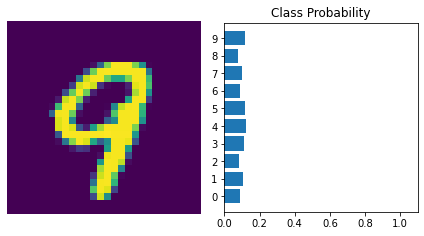

In [ ]:
def view_classify(img, ps):
    ''' Function for viewing an image and it's predicted classes.
    '''
    ps = ps.cpu().data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.numpy().squeeze())
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    ax2.set_yticklabels(np.arange(10))
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)
    plt.tight_layout()

view_classify(img.view(1, 28, 28), ps)

correct_count, all_count = 0, 0
for images,labels in valloader:
  for i in range(len(labels)):
    img = images[i].view(1, 784)
    with torch.no_grad():
        logps = model(img)

    
    ps = torch.exp(logps)
    probab = list(ps.numpy()[0])
    pred_label = probab.index(max(probab))
    true_label = labels.numpy()[i]
    if(true_label == pred_label):
      correct_count += 1
    all_count += 1

print("Number Of Images Tested =", all_count)
print("\nModel Accuracy =", (correct_count/all_count))

torch.save(model, './my_mnist_model.pt') 